In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df1 = pd.read_csv('../Data_preparada/data_educacion_c.csv')
df2 = pd.read_csv('../Data_preparada/data_esperanza_vida_c.csv')
df3 = pd.read_csv('../Data_preparada/data_gasto_salud_c.csv')
df4 = pd.read_csv('../Data_preparada/data_inflacion_c.csv')
df5 = pd.read_csv('../Data_preparada/data_concate.csv')

In [6]:
df5.rename(columns={'país Name': 'país'}, inplace=True)

In [7]:
df_concat = pd.concat([df1,df2,df3,df4,df5])

In [8]:
df_concat.sort_values('país', inplace=True)

In [9]:
df_concat.to_csv('../Data/merge_data.csv', index=False)

In [10]:
df = pd.read_csv('../Data/merge_data.csv')

In [11]:
df

,país,factor_(serie),Año,Valor
0,Afganistán,"Nivel de instrucción, al menos ciclo inferior ...",1987,1.336687e+01
1,Afganistán,Población rural,1997,1.390997e+07
2,Afganistán,Población rural,1996,1.339207e+07
3,Afganistán,Población rural,1995,1.286849e+07
4,Afganistán,Población rural,1994,1.212736e+07
...,...,...,...,...
48199,Venezuela,"Nivel de instrucción, al menos ciclo superior ...",2011,4.694000e+01
48200,Venezuela,"Nivel de instrucción, al menos escuela de nive...",2011,2.486440e+01
48201,Venezuela,Tasa de finalización del ciclo inferior de la ...,2011,7.618580e+01
48202,Venezuela,Gasto nacional en salud del gobierno general p...,2001,1.742315e+02


In [12]:
df.dtypes

país               object
factor_(serie)     object
Año                 int64
Valor             float64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   país            48204 non-null  object 
 1   factor_(serie)  48204 non-null  object 
 2   Año             48204 non-null  int64  
 3   Valor           48204 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ MB


In [14]:
# Convierte la columna 'Año' a formato de texto
df['Año'] = df['Año'].astype(str)

In [15]:
# Aplicar la función pivot
df_pivoted = df.pivot_table(index=['país','Año'], columns='factor_(serie)', values='Valor').reset_index()
df_pivoted

factor_(serie),país,Año,Crecimiento de la población (% anual),Crecimiento de la población rural (% anual),Crecimiento de la población urbana (% anual),Crecimiento del PIB per cápita (% anual),"Esperanza de vida al nacer, mujeres (años)","Esperanza de vida al nacer, total (años)","Esperanza de vida al nacer, varones (años)",Gasto de bolsillo per cápita (US$ actuales),...,"Población entre 0 y 14 años de edad, total","Población entre 15 y 64 años de edad, hombres","Población entre 15 y 64 años de edad, mujeres","Población entre 15 y 64 años de edad, total",Población rural,Población urbana,"Población, hombres","Población, mujeres","Población, total","Tasa de finalización del ciclo inferior de la educación secundaria, total (% del grupo etario pertinente)"
0,Afganistán,1987,-1.210190,-2.043746,2.128391,NaN,43.453000,39.844000,36.739000,37.732205,...,4861986.0,2584447.0,2642480.0,5226926.0,8225793.0,2096965.0,5170108.0,5152650.0,10322758.0,43.790883
1,Afganistán,1988,0.586318,-0.275758,3.898014,NaN,46.569000,43.958000,41.572000,37.732205,...,4903210.0,2588283.0,2658113.0,5246397.0,8203141.0,2180319.0,5195399.0,5188060.0,10383460.0,43.790883
2,Afganistán,1989,2.751877,2.637888,3.179585,NaN,47.610000,45.158000,42.891000,37.732205,...,5052384.0,2651905.0,2728782.0,5380687.0,8422410.0,2250758.0,5338559.0,5334609.0,10673168.0,43.790883
3,Afganistán,1990,0.202434,0.089590,0.623574,NaN,48.397000,45.967000,43.709000,37.732205,...,5077301.0,2648305.0,2728925.0,5377229.0,8429959.0,2264837.0,5348387.0,5346409.0,10694796.0,43.790883
4,Afganistán,1991,0.469880,0.356909,0.889255,NaN,49.144000,46.663000,44.353000,37.732205,...,5119303.0,2650263.0,2734246.0,5384510.0,8460100.0,2285067.0,5372959.0,5372208.0,10745167.0,43.790883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,Venezuela,2018,-2.443543,-2.655330,-2.415197,NaN,76.431000,71.979000,67.832000,61.016500,...,8469719.0,9532382.0,9672311.0,19204694.0,3517041.0,26308612.0,14804135.0,15021517.0,29825653.0,60.050418
1580,Venezuela,2019,-2.904996,-3.176733,-2.868725,NaN,76.566000,72.161000,68.034000,38.646000,...,8287106.0,9168546.0,9307647.0,18476193.0,3407070.0,25564613.0,14365872.0,14605811.0,28971683.0,60.050418
1581,Venezuela,2020,-1.674986,-2.007172,-1.630797,NaN,75.814000,71.095000,66.739000,36.873600,...,8115290.0,8980231.0,9117308.0,18097538.0,3339366.0,25151087.0,14113760.0,14376694.0,28490453.0,60.050418
1582,Venezuela,2021,-1.025179,-1.418423,-0.973083,NaN,75.207000,70.554000,66.259000,164.104976,...,7944108.0,8884583.0,9019833.0,17904416.0,3292334.0,24907533.0,13956811.0,14243056.0,28199867.0,60.050418


In [33]:
columnas_a_eliminar =['país','Año']
df_pivoted = df_pivoted.drop(columnas_a_eliminar, axis=1)

In [34]:
df_pivoted.isna().sum()

factor_(serie)
Crecimiento de la población (% anual)                                                                                                         0
Crecimiento de la población rural (% anual)                                                                                                   0
Crecimiento de la población urbana (% anual)                                                                                                  0
Crecimiento del PIB per cápita (% anual)                                                                                                    180
Esperanza de vida al nacer, mujeres (años)                                                                                                    0
Esperanza de vida al nacer, total (años)                                                                                                      0
Esperanza de vida al nacer, varones (años)                                                                               

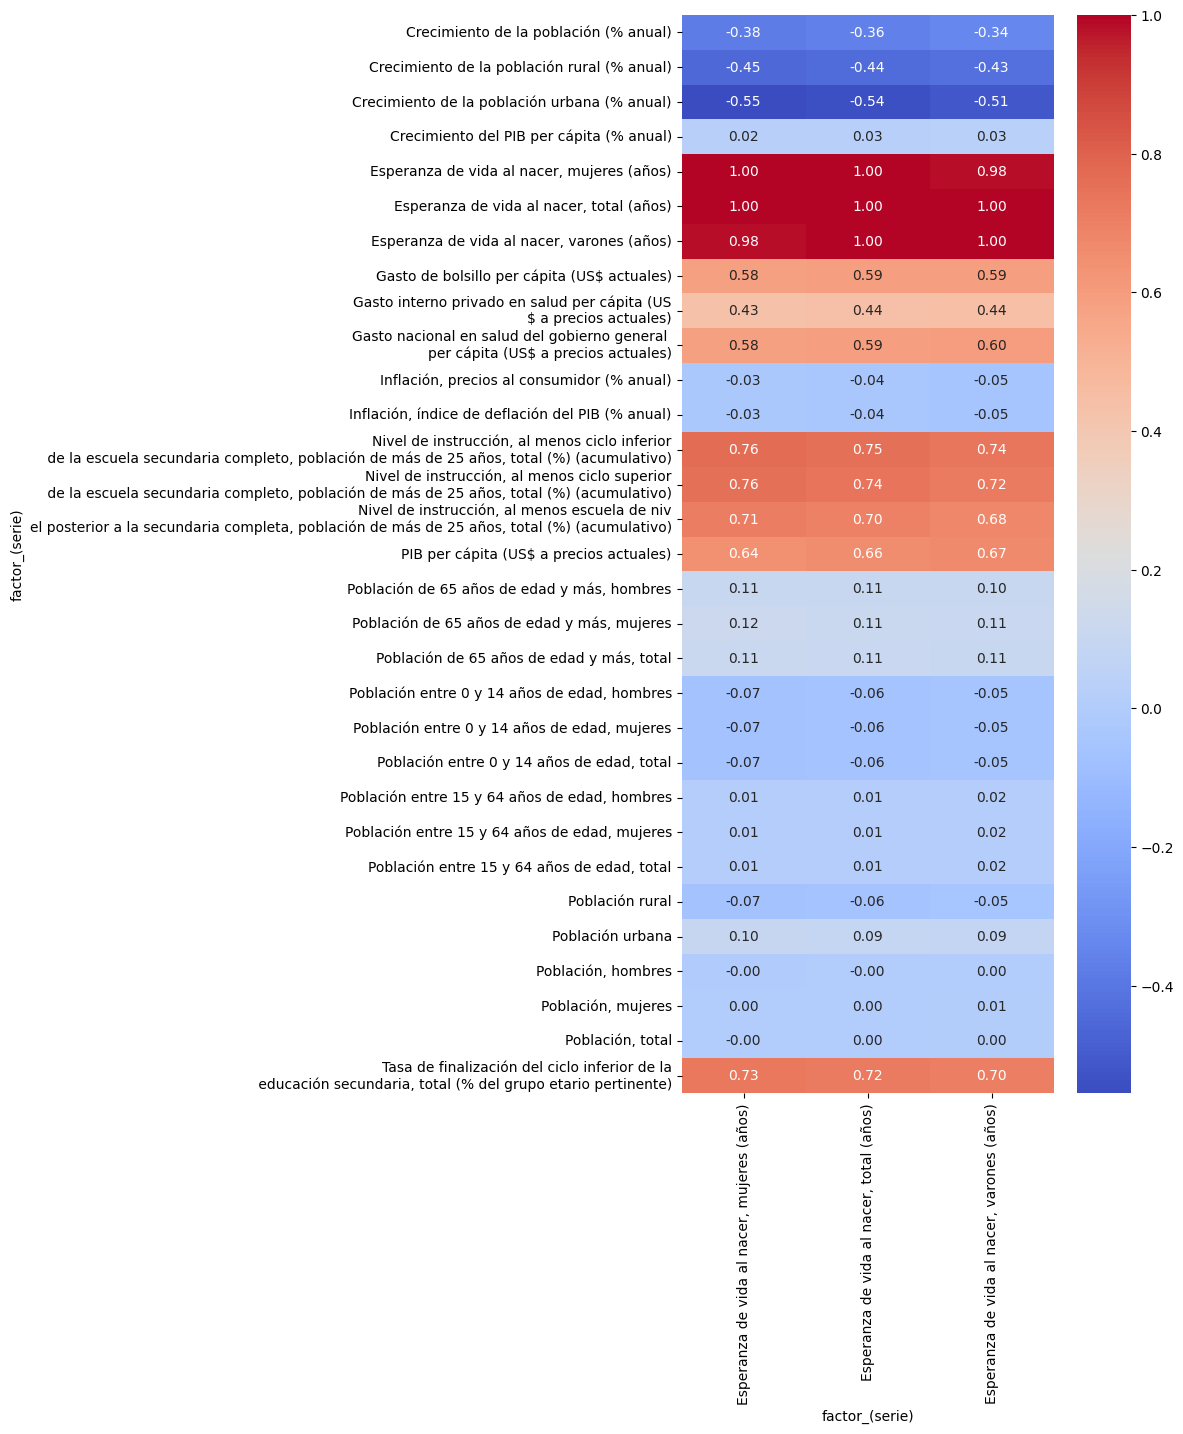

In [42]:
# Supongamos que df_pivoted es tu DataFrame y estas son las columnas relevantes
columnas_relevantes = ["Esperanza de vida al nacer, mujeres (años)",
                       "Esperanza de vida al nacer, total (años)",
                       "Esperanza de vida al nacer, varones (años)"]  # Reemplaza con los nombres reales de tus variables

# Crear el gráfico de correlación
plt.figure(figsize=(6, 14))

# Obtener los nombres de las columnas
nombres_columnas = df_pivoted.columns

# Aplicar un salto de línea si el nombre es muy largo para todas las columnas excepto las tres variables de interés
nuevos_nombres_columnas = [nombre[:45] + '\n' + nombre[45:] if len(nombre) > 48 and nombre not in columnas_relevantes else nombre for nombre in nombres_columnas]

# Crear el mapa de calor con los nuevos nombres
sns.heatmap(df_pivoted.corr()[columnas_relevantes], annot=True, cmap='coolwarm', fmt='.2f',yticklabels=nuevos_nombres_columnas)

# Mostrar el gráfico
plt.show()